<a href="https://colab.research.google.com/github/DeeS17/exploratory_data_analysis_and_hypothesis_testing/blob/main/sprint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konten

* Tahap 1: Pra-Pemrosesan Data
    * Memuat Data
    * Mengeksplorasi Data Awal
* Tahap 2: Analisa Data Eksploratif
    * 10 Wilayah Pengantaran Teratas
    * 10 Perusahaan Taksi dengan Perjalanan Terbanyak
* Menguji Hipotesis
* Kesimpulan

# Pendahuluan

Zuber adalah sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Pada project ini Saya mencari pola pada informasi yang tersedia untuk memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

# Tujuan

Untuk mengetahui apakah faktor eksternal mempengaruhi perjalanan maka saya akan menguji hipotesis:
- Apakah Ada Perbedaan Rata-Rata Durasi Perjalanan Pada Hari Sabtu antara ketika Cuaca Hujan dengan ketika Cuaca Tidak Hujan.

# Tahapan

- Pra-Pemrosessan Data
- Analisa Data Eksploratif
- Menguji Hipotesis
- Kesimpulan

## Pra-pemrosesan Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Memuat Data

In [ ]:
try:
  trips_by_company = pd.read_csv('/datasets/project_sql_result_01.csv')
  avg_trip_by_do_loc = pd.read_csv('/datasets/project_sql_result_04.csv')
  ohare_loop = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
  trips_by_company = pd.read_csv('/content/project_sql_result_01.csv')
  avg_trip_by_do_loc = pd.read_csv('/content/project_sql_result_04.csv')
  ohare_loop = pd.read_csv('/content/project_sql_result_07.csv')

### Mengeksplorasi Data Awal

In [ ]:
trips_by_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
trips_by_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Ada 64 data perusahaan taxi beserta jumlah perjalananya. Tidak ada data yang hilang dan masing-masing kolom telah sesuai tipe datanya.

In [ ]:
trips_by_company.duplicated().sum()

0

Tidak ada nilai yang terduplikat. Selanjutnya saya akan memeriksa tabel berikutnya.

In [ ]:
avg_trip_by_do_loc.head()   

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
avg_trip_by_do_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Ada 94 data lokasi pengantaran beserta rata-rata perjalanan pada masing-masing lokasi. Tida ada data yang hilang dan tipe data dari masing-masing kolomg telah sesuai. 

In [ ]:
avg_trip_by_do_loc.duplicated().sum()

0

Tidak ada data duplikat pada tabel rata-rata jumlah perjalanan per lokasi pengantaran. Selanjutnya saya akan memeriksa data yang akan digunakan untuk menguji hipotesis.

In [ ]:
ohare_loop.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
ohare_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Ada `1,068` data dan tidak ada data yang hilang. Namun unuk kolom `start_ts` perlu disesuaikan tipe datanya, karena seharusnya tipe datanya `datetime`. 

In [ ]:
ohare_loop['start_ts'] = pd.to_datetime(ohare_loop['start_ts'])
ohare_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Tipe datanya sudah sudah disesuaikan.

## Analisa Data Eksploratif

### 10 Wilayah Pengantaran Teratas 

In [ ]:
top_10_loc = avg_trip_by_do_loc.sort_values(by=['average_trips'], ascending=False).head(10)
top_10_loc

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


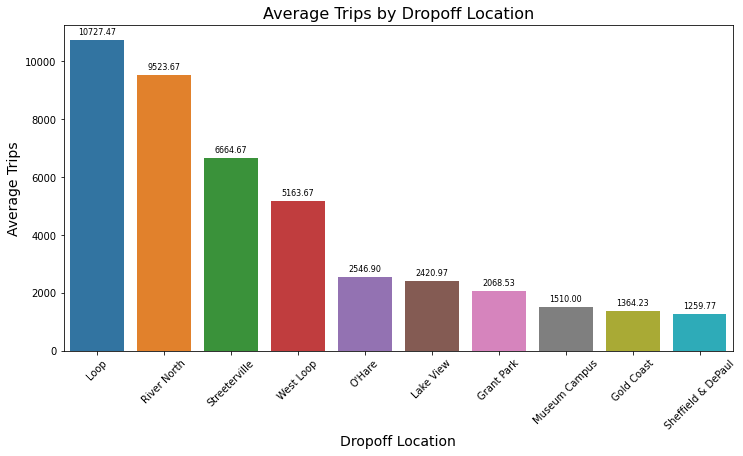

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data=top_10_loc, x='dropoff_location_name', y='average_trips', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Average Trips by Dropoff Location', size=16)
plt.xlabel('Dropoff Location', size=14)
plt.ylabel('Average Trips', size=14)
plt.show()

Dari data diatas, menunjukan 10 wilayah pengantaran teratas. Tiga wilayah teratas dipimpin oleh wilayah `loop`, lalu disusul oleh `river north` dan `streeterville`.

### 10 Perusahaan Taksi dengan Perjalanan Terbanyak

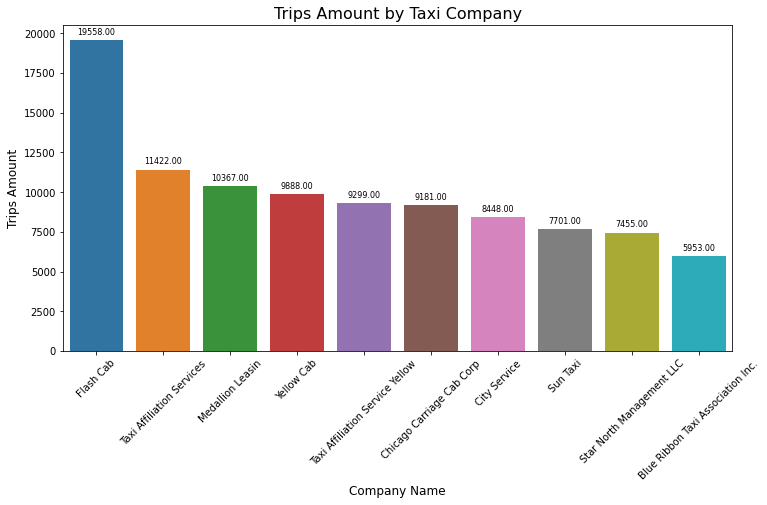

In [ ]:
top_10_tc_by_trip = trips_by_company.sort_values(by=['trips_amount'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data = top_10_tc_by_trip, x='company_name', y='trips_amount', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Trips Amount by Taxi Company', size=16)
plt.ylabel('Trips Amount', size=12)
plt.xlabel('Company Name', size=12)
plt.show()

Dari grafik diatas menunjukan 10 perusahaan taksi dengan jumlah perjalanan terbanyak. Tiga besar dipimpin oleh `Flash Cab`, disusul oleh `Taxi Affiliation Services`, dan `Medallion Leasing`. Namun dari ketiga perusahaan tersebut, `Flash Cab` jumlahnya jauh lebih besar dari 2 lainnya. Jumlah perjalanan `Flash Cab` hampir dua kali perjalanan `Taxi Affiliation Services` dan `Medallion Leasing`.

## Menguji Hipotesis

Selanjutnya saya akan menguji hipotesis apakah ada perbedaan yang signifikan dari rata-rata durasi perjalanan dengan kondisi hari sabtu dengan cuaca hujan dibandingkan kondisi lainnya. Karena saya memiliki asumsi, hari sabtu dan cuaca hujan merupakan faktor-faktor yang mendorong konsumen menggunakan lebih sering jasa taksi kearah Bandara. Sebelum memulai pengujian, saya akan merumuskan hipotesisnya.
- Hipotesis Nol: Rata-Rata Durasi Perjalanan Pada Hari Sabtu dengan Cuaca Hujan Sama dengan Rata-Rata Durasi Perjalanan Pada Hari Sabtu dengan Cuaca Tidak Hujan.
- Hipotesis Alternatif: Rata-Rata Durasi Perjalanan Pada Hari Sabtu dengan Cuaca Hujan Tidak Sama dengan Rata-Rata Durasi Perjalanan Pada Hari Sabtu dengan Cuaca Tidak Hujan.

Nilai `alpha` yang digunakan adalah `5%`. Nilai tersebut yang ditentukan karena batas signifikansi `5%` umum digunakan dalam penelitian ilmu sosial, sehingga batas nilai tersebut menurut saya cukup.  

Selain itu, saya akan menambahkan kolom `dow` (day of week), agar dapat memisahkan data dengan kondisi hari `sabtu`.

In [ ]:
ohare_loop['dow'] = pd.DatetimeIndex(ohare_loop['start_ts']).dayofweek
ohare_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   dow                 1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB


Kolom `dow` telah ditambahhkan.

In [ ]:
ohare_loop['dow'].unique()

array([5])

Ternyata data yang ada didalam dataset merupakan pejalanan pada hari sabtu.

In [ ]:
ohare_loop_sat_rain = ohare_loop.loc[ohare_loop['weather_conditions'] == 'Bad', 'duration_seconds'].copy()
ohare_loop_other = ohare_loop.loc[ohare_loop['weather_conditions'] != 'Bad', 'duration_seconds'].copy()

def h_testing_ind(samp1, samp2, alpha, tail) :
    result = ttest_ind(samp1, samp2)
    pval = result.pvalue
    
    if tail == 1 :
        if (samp1.mean() > samp2.mean()) and (alpha > pval):
            print('P-Value adalah: '+ str(pval/2))
            print ('Kita menolak hipotesis nol')
            return
        else :
            print('P-Value adalah: '+ str(pval/2))
            print ('Kita tidak dapat menolak hipotesis nol')
            return
    elif tail == 2:
        if alpha > pval :
            print('P-Value adalah: '+ str(pval))
            print ('Kita menolak hipotesis nol')
            return
        else :
            print('P-Value adalah: '+ str(pval))
            print ('Kita tidak dapat menolak hipotesis nol')
            return
    else :
        print('Error, parameter tail hanya antara 1 atau 2')
        return

In [ ]:
h_testing_ind(ohare_loop_sat_rain, ohare_loop_other, 0.05, 2)

P-Value adalah: 6.517970327099473e-12
Kita menolak hipotesis nol


`P-Value`nya jauh lebih kecil dari nilai `alpha`. Artinya rata-rata durasi perjalanan pada hari sabtu dengan cuaca hujan tidak sama dengan rata-rata durasi perjalanan pada hari sabtu dengan cuaca tidak hujan. Selanjutnya saya akan melihat rata-rata durasi perjalanan ketika hujan dan tidak hujan.

In [ ]:
ohare_loop_sat_rain_mean = ohare_loop_sat_rain.mean()
ohare_loop_other_mean = ohare_loop_other.mean()

print('Rata-rata durasi perjalanan ketika hujan: '+ str(ohare_loop_sat_rain_mean))
print('Rata-rata durasi perjalanan ketika tidak hujan: '+ str(ohare_loop_other_mean))

Rata-rata durasi perjalanan ketika hujan: 2427.2055555555557
Rata-rata durasi perjalanan ketika tidak hujan: 1999.6756756756756


Hasilnya menunjukan perjalanan di hari sabtu ketika hujan rata-rata durasinya lebih lama dengan perjalanan ketika tidak hujan. Perbedaaanya sekitar `427` detik, atau sekitar 7 menit. 

## Kesimpulan

Dari Analisa data eksploratif yang telah dilakukan menunjukan `Flash Cab` merupakan perusahaan taksi yang memiliki perjalanan terbanyak dan jaraknya jauh diatas perusahaan taksi lainnya. Poin kedua adalah lokasi dropoff terbanyak adalah `Loop` dan poin ketiga adalah cuaca hujan ternyata meningkatkan durasi perjalanan. 

Peningkatan durasi perjalanan belum tentu menguntungkan. Tergantung sistem menentukan harga suatu perjalanan. Jika menggunakan mesin argo maka dengan meningkatnya durasi perjalanan otomatis akan meningkatkan harga suatu perjalanan. Namun jika menggunakan harga penentuan harga diawal, maka perusahaan perlu menentukan harga lebih tinggi ketika kondisi hujan.  